In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Aceh.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  354 non-null    datetime64[ns]
 1   Tn       351 non-null    float64       
 2   Tx       345 non-null    float64       
 3   Tavg     342 non-null    float64       
 4   RH_avg   342 non-null    float64       
 5   RR       350 non-null    float64       
 6   ss       350 non-null    float64       
 7   ff_x     351 non-null    float64       
 8   ddd_x    351 non-null    float64       
 9   ff_avg   351 non-null    float64       
 10  ddd_car  351 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 30.5+ KB


C:\Users\rivan\AppData\Local\Temp\ipykernel_1456\1971878306.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.0,NaN,0.0,NaN
1,2023-02-01,22.4,NaN,0.0,26.1
2,2023-03-01,22.6,31.2,0.0,26.4
3,2023-04-01,23.0,NaN,0.0,NaN
4,2023-05-01,22.7,31.8,0.0,27.1
...,...,...,...,...,...
349,2023-12-16,23.2,32.8,36.6,27.5
350,2023-12-17,22.8,32.0,8888.0,27.3
351,2023-12-18,23.0,30.4,26.8,27.0
352,2023-12-19,24.2,32.5,0.0,28.2


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

0

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.0,NaN,0.0,NaN
1,31,31,2023-01-02,21.4,32.2,8.3,26.3
2,59,59,2023-01-03,22.8,30.1,0.8,26.1
3,90,90,2023-01-04,23.0,32.2,5.5,27.2
4,120,120,2023-01-05,24.4,33.2,0.0,28.0
...,...,...,...,...,...,...,...
349,349,349,2023-12-16,23.2,32.8,36.6,27.5
350,350,350,2023-12-17,22.8,32.0,0.0,27.3
351,351,351,2023-12-18,23.0,30.4,26.8,27.0
352,352,352,2023-12-19,24.2,32.5,0.0,28.2


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          3
Tx          9
RR          4
Tavg       12
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       7
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

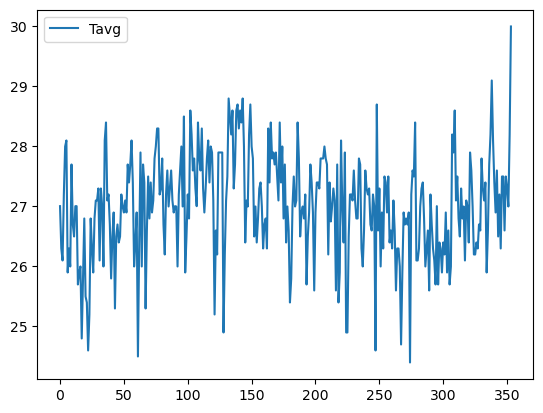

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

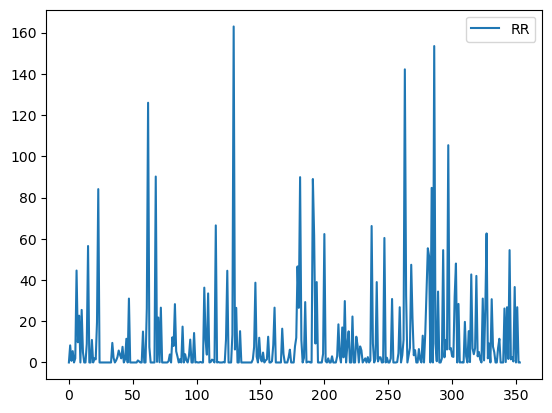

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.0,31.596232,0.0,27.005331,32.2,26.3,8.3
1,31,31,2023-01-02,21.4,32.200000,8.3,26.300000,30.1,26.1,0.8
2,59,59,2023-01-03,22.8,30.100000,0.8,26.100000,32.2,27.2,5.5
3,90,90,2023-01-04,23.0,32.200000,5.5,27.200000,33.2,28.0,0.0
4,120,120,2023-01-05,24.4,33.200000,0.0,28.000000,32.2,28.1,2.0
...,...,...,...,...,...,...,...,...,...,...
349,349,349,2023-12-16,23.2,32.800000,36.6,27.500000,32.0,27.3,0.0
350,350,350,2023-12-17,22.8,32.000000,0.0,27.300000,30.4,27.0,26.8
351,351,351,2023-12-18,23.0,30.400000,26.8,27.000000,32.5,28.2,0.0
352,352,352,2023-12-19,24.2,32.500000,0.0,28.200000,34.0,30.0,0.0


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.0,27.005331,26.3,8.3
1,8.3,26.300000,26.1,0.8
2,0.8,26.100000,27.2,5.5
3,5.5,27.200000,28.0,0.0
4,0.0,28.000000,28.1,2.0
...,...,...,...,...
349,36.6,27.500000,27.3,0.0
350,0.0,27.300000,27.0,26.8
351,26.8,27.000000,28.2,0.0
352,0.0,28.200000,30.0,0.0


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.0,27.005331,26.3,8.3
1,8.3,26.300000,26.1,0.8
2,0.8,26.100000,27.2,5.5
3,5.5,27.200000,28.0,0.0
4,0.0,28.000000,28.1,2.0
...,...,...,...,...
348,0.5,26.600000,27.5,36.6
349,36.6,27.500000,27.3,0.0
350,0.0,27.300000,27.0,26.8
351,26.8,27.000000,28.2,0.0


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.0,27.005331,26.3,8.3,0
1,8.3,26.300000,26.1,0.8,1
2,0.8,26.100000,27.2,5.5,2
3,5.5,27.200000,28.0,0.0,3
4,0.0,28.000000,28.1,2.0,4
...,...,...,...,...,...
348,0.5,26.600000,27.5,36.6,348
349,36.6,27.500000,27.3,0.0,349
350,0.0,27.300000,27.0,26.8,350
351,26.8,27.000000,28.2,0.0,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,27.0
283,283,27.3
284,284,27.4
285,285,26.8
286,286,26.0
...,...,...
348,348,26.6
349,349,27.5
350,350,27.3
351,351,27.0


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([27.02357315, 27.13925738, 27.17786851, 26.94672381, 26.63850601,
       26.75419024, 26.86987447, 26.48458358, 27.10124293, 26.90863478,
       26.75456318, 26.67756467, 26.52349306, 27.02659731, 26.52364224,
       26.79347266, 26.75501069, 26.60093909, 26.79369641, 26.71669791,
       26.98652833, 26.60123744, 26.87106786, 26.52431351, 26.63999774,
       27.48787638, 27.37234132, 27.64217174, 27.06419811, 27.21841889,
       26.94873764, 26.83320259, 27.14156955, 26.9489614 , 27.02610908,
       26.67935474, 27.0647948 , 27.02633284, 26.79518814, 27.37331095,
       27.25777589, 27.02663119, 26.71841339, 26.71848798, 26.79563566,
       26.7571737 , 26.91139448, 26.87293252, 27.33544568, 27.14283752,
       27.06583901, 27.18152324, 26.60354961, 26.87338003, 27.29735665,
       27.49011397, 27.83701749, 27.4517266 , 27.18204535, 26.9894372 ,
       27.25926762, 26.83544018, 27.1052706 , 26.75851626, 27.22102941,
       27.221104  , 26.87434966, 27.22125317, 27.14425467, 27.02

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.5824369424573946 0.5459149919244204


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,27.0
283,283,27.3
284,284,27.4
285,285,26.8
286,286,26.0
...,...,...
348,348,26.6
349,349,27.5
350,350,27.3
351,351,27.0


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,27.023573
283,27.139257
284,27.177869
285,26.946724
286,26.638506
...,...
348,26.874350
349,27.221253
350,27.144255


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

C:\Users\rivan\AppData\Local\Temp\ipykernel_1456\2636922572.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.005331,NaN
1,26.300000,NaN
2,26.100000,NaN
3,27.200000,NaN
4,28.000000,NaN
...,...,...
348,26.600000,26.874350
349,27.500000,27.221253
350,27.300000,27.144255
351,27.000000,27.028720


<Axes: >

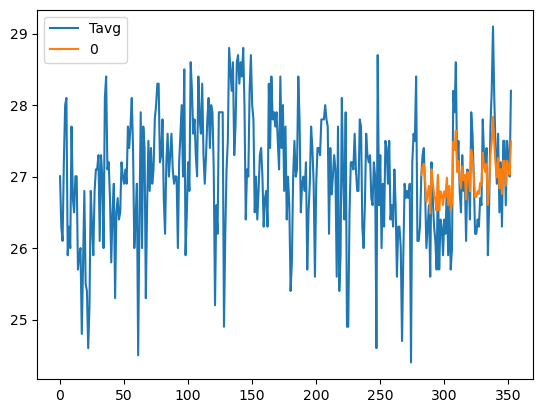

In [27]:
kan.plot()

In [31]:
new_data = [[354, 28.2],[355,28.2],[356,28.2],[357,28.2],[358,28.2],[359,28.2],[360,28.2]]
lr.predict(new_data)

C:\Users\rivan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.49138194, 27.49145653, 27.49153111, 27.4916057 , 27.49168029,
       27.49175487, 27.49182946])

In [32]:
kan.to_json('Prediksi Aceh.json')